In [383]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import smote as smote
from imblearn.over_sampling import RandomOverSampler
from statsmodels.imputation import ros
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [384]:
main_dir = "D:\\Competitions\\DataStorm-Final-2021"
data_dir = os.path.join(main_dir,"data\\Data\\")
logs_dir = os.path.join(main_dir,"logs\\")
scripts_dir = os.path.join(main_dir,"src\\scripts\\")
model_dir = os.path.join(main_dir,"src\\models\\")
feature_dir = os.path.join(data_dir,"feature\\")

In [385]:
filename = "filtered.csv"
dataframe = pd.read_csv(os.path.join(data_dir,filename))
sample = dataframe.sample(n=10)

In [386]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 242135 to 533250
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   main_holder_occupation_cd  10 non-null     float64
 1   policy_term                10 non-null     int64  
 2   policy_payment_mode        10 non-null     object 
 3   policy_status              10 non-null     object 
 4   commencement_dt            10 non-null     object 
 5   next_due_dt                10 non-null     object 
 6   termination_dt             0 non-null      object 
 7   termination_reason         1 non-null      object 
 8   main_holder_gender         10 non-null     object 
 9   main_holder_dob            10 non-null     object 
 10  main_holder_entry_age      10 non-null     int64  
 11  main_holder_smoker_flag    10 non-null     object 
 12  spouse_gender              2 non-null      object 
 13  spouse_dob                 2 non-null      

In [387]:
allColumns = list(dataframe.columns)
allColumns

snapshots = dataframe['policy_snapshot_as_on'].unique()

In [388]:
categorical_columns = []
ordinal_columns = []
continuous_columns = []
remove_columns = ['spouse_smoker_flag','child1_gender','child2_gender','spouse_entry_age','spouse_dob','spouse_gender','termination_dt','termination_reason','child3_gender','child4_gender','child5_gender','main_holder_occupation','run_date','product_name']
keep_columns = [x for x in allColumns if x not in remove_columns]
target_column = 'Survived'

In [389]:
dataframe.shape

(601714, 62)

In [390]:
for each in allColumns:
    print(each,"   ",dataframe[each].unique().size)

main_holder_occupation_cd     319
policy_term     35
policy_payment_mode     5
policy_status     3
commencement_dt     1782
next_due_dt     1435
termination_dt     480
termination_reason     12
main_holder_gender     2
main_holder_dob     632
main_holder_entry_age     50
main_holder_smoker_flag     2
spouse_gender     3
spouse_dob     537
spouse_entry_age     48
spouse_smoker_flag     3
total_sum_assuared     1914
premium_value     6321
rider1_prem     16
rider1_sum_assuared     6
rider2_prem     790
rider2_sum_assuared     704
rider3_prem     249
rider3_sum_assuared     111
rider4_prem     169
rider4_sum_assuared     16
rider5_prem     235
rider5_sum_assuared     61
rider6_prem     229
rider6_sum_assuared     181
rider7_prem     77
rider7_sum_assuared     40
rider8_prem     1744
rider8_sum_assuared     136
rider9_prem     1134
rider9_sum_assuared     14
rider10_prem     620
rider10_sum_assuared     458
child1_dob     283
child1_gender     3
child2_dob     239
child2_gender     3
child

In [393]:
data_null_per = dataframe.isnull().sum()/dataframe.shape[0]
print(data_null_per)

main_holder_occupation_cd    0.000108
policy_term                  0.000000
policy_payment_mode          0.000000
policy_status                0.000000
commencement_dt              0.000000
                               ...   
policy_snapshot              0.000000
month_rank                   0.000000
num_pl                       0.000000
is_added                     0.000000
is_cross_sell                0.000000
Length: 62, dtype: float64


In [394]:
type(data_null_per)

pandas.core.series.Series

<AxesSubplot:>

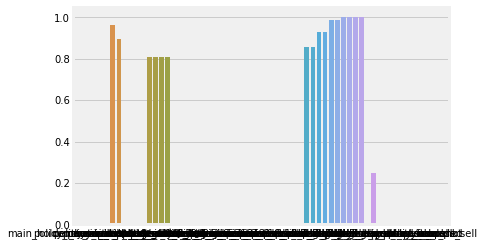

In [395]:
sns.barplot(x=data_null_per.index,y=data_null_per.values)

In [348]:
dataframe['main_holder_occupation_cd'].value_counts()

165.0    100495
249.0     53565
450.0     33349
321.0     22647
392.0     20520
          ...  
147.0         5
201.0         5
143.0         5
222.0         5
456.0         3
Name: main_holder_occupation_cd, Length: 318, dtype: int64

In [349]:
dataframe['main_holder_occupation_cd'].fillna(165.0 , inplace=True)

In [350]:
dataframe.groupby(by = ['policy_code','client_code']).count()

,,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,...,policy_snapshot_as_on,run_date,agent_code,product_code,product_name,policy_snapshot,month_rank,num_pl,is_added,is_cross_sell
policy_code,client_code,,,,,,,,,,,,,,,,,,,,,
POL0001,C105157,19,19,19,19,19,19,0,0,19,19,...,19,19,19,19,19,19,19,19,19,19
POL0002,C109481,19,19,19,19,19,19,0,0,19,19,...,19,19,19,19,19,19,19,19,19,19
POL0003,C101338,20,20,20,20,20,20,0,0,20,20,...,20,20,20,20,20,20,20,20,20,20
POL0004,C111935,19,19,19,19,19,19,0,0,19,19,...,19,19,19,19,19,19,19,19,19,19
POL0005,C120566,19,19,19,19,19,19,0,0,19,19,...,19,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POL9995,C100099,19,19,19,19,19,19,0,0,19,19,...,19,19,19,19,19,19,19,19,19,19
POL9996,C118651,19,19,19,19,19,19,0,0,19,19,...,19,19,19,19,19,19,19,19,19,19
POL9997,C104744,20,20,20,20,20,20,0,0,20,20,...,20,20,20,20,20,20,20,20,20,20


In [351]:
dataframe.loc[(dataframe['policy_code'] == "POL0001")&(dataframe['client_code'] == "C105157")].sort_values(by=["policy_snapshot_as_on"],ascending=True)["policy_snapshot_as_on"]

127744    20181231
127746    20190131
127745    20190228
127751    20190331
127740    20190430
127754    20190531
127738    20190630
127743    20190731
127750    20190831
127747    20190901
127749    20191001
127737    20191101
127736    20191201
127748    20200201
127753    20200301
127739    20200401
127742    20200501
127741    20200601
127752    20200701
Name: policy_snapshot_as_on, dtype: int64

In [352]:
dataframe = dataframe[keep_columns]

In [353]:
dataframe.columns

Index(['main_holder_occupation_cd', 'policy_term', 'policy_payment_mode',
       'policy_status', 'commencement_dt', 'next_due_dt', 'main_holder_gender',
       'main_holder_dob', 'main_holder_entry_age', 'main_holder_smoker_flag',
       'total_sum_assuared', 'premium_value', 'rider1_prem',
       'rider1_sum_assuared', 'rider2_prem', 'rider2_sum_assuared',
       'rider3_prem', 'rider3_sum_assuared', 'rider4_prem',
       'rider4_sum_assuared', 'rider5_prem', 'rider5_sum_assuared',
       'rider6_prem', 'rider6_sum_assuared', 'rider7_prem',
       'rider7_sum_assuared', 'rider8_prem', 'rider8_sum_assuared',
       'rider9_prem', 'rider9_sum_assuared', 'rider10_prem',
       'rider10_sum_assuared', 'child1_dob', 'child2_dob', 'child3_dob',
       'child4_dob', 'child5_dob', 'payment_method', 'policy_snapshot_as_on',
       'client_code', 'agent_code', 'product_code', 'policy_code',
       'policy_snapshot', 'month_rank', 'num_pl', 'is_added', 'is_cross_sell'],
      dtype='object')

In [354]:
def add_index(df):
    df['policy_snapshot'] = pd.to_datetime(df['policy_snapshot_as_on'],format='%Y%m%d')
    df['unique'] = df['policy_snapshot_as_on'].apply(str)+" "+df['client_code']
    df.sort_values(by=["unique"],ascending=True,inplace=True)



def count_riders(df):
    #rider_df = df[['rider1_prem','rider1_sum_assuared','rider2_prem','rider2_sum_assuared','rider3_prem','rider3_sum_assuared','rider4_prem','rider4_sum_assuared','rider5_prem','rider5_sum_assuared','rider6_prem','rider6_sum_assuared','rider7_prem','rider7_sum_assuared','rider8_prem','rider8_sum_assuared','rider9_prem','rider9_sum_assuared','rider10_prem','rider10_sum_assuared']]
    df['total_rider_prem'] = df[['rider1_prem','rider2_prem','rider3_prem','rider4_prem','rider5_prem','rider6_prem','rider7_prem','rider8_prem','rider9_prem','rider10_prem']].sum(axis=1)
    df['total_rider_sum_assuared'] = df[['rider1_sum_assuared','rider2_sum_assuared','rider3_sum_assuared','rider4_sum_assuared','rider5_sum_assuared','rider6_sum_assuared','rider7_sum_assuared','rider8_sum_assuared','rider9_sum_assuared','rider10_sum_assuared']].sum(axis=1)
    #rider_df = rider_df['rider1_prem','rider2_prem','rider3_prem','rider4_prem','rider5_prem','rider6_prem','rider7_prem','rider8_prem','rider9_prem','rider10_prem']
    #rider_df = rider_df.T

def policy_term(df):
    df['policy_term'] = df['policy_term']*12


def count_children(df):
    children_df = df[['child1_dob','child2_dob','child3_dob','child4_dob','child5_dob']]
    null_df = pd.isnull(children_df).T
    null_df = null_df.replace([True,False],[1,0])
    null_df = 5-null_df.sum(axis=0)
    df['children_count'] = null_df

def month_rank(df):
    df['month_rank'] = df['policy_snapshot'].dt.year*12+df['policy_snapshot'].dt.month
    df['month_rank'] = df['month_rank'] - df['month_rank'].min()

In [355]:
policy_term(dataframe)
add_index(dataframe)
count_riders(dataframe)
count_children(dataframe)
month_rank(dataframe)
starting_month = dataframe['policy_snapshot'].min()

In [356]:
print(starting_month)

2018-12-31 00:00:00


In [357]:
dataframe = dataframe[[x for x in dataframe.columns if x not in ['rider1_prem','rider1_sum_assuared','rider2_prem','rider2_sum_assuared','rider3_prem','rider3_sum_assuared','rider4_prem','rider4_sum_assuared','rider5_prem','rider5_sum_assuared','rider6_prem','rider6_sum_assuared','rider7_prem','rider7_sum_assuared','rider8_prem','rider8_sum_assuared','rider9_prem','rider9_sum_assuared','rider10_prem','rider10_sum_assuared','child3_dob','child4_dob','child5_dob']]]

In [358]:
for each in ['child1_dob','child2_dob']:

    dataframe[each].fillna(0,inplace=True)

In [359]:
dataframe.isnull().sum()

main_holder_occupation_cd    0
policy_term                  0
policy_payment_mode          0
policy_status                0
commencement_dt              0
next_due_dt                  0
main_holder_gender           0
main_holder_dob              0
main_holder_entry_age        0
main_holder_smoker_flag      0
total_sum_assuared           0
premium_value                0
child1_dob                   0
child2_dob                   0
payment_method               0
policy_snapshot_as_on        0
client_code                  0
agent_code                   0
product_code                 0
policy_code                  0
policy_snapshot              0
month_rank                   0
num_pl                       0
is_added                     0
is_cross_sell                0
unique                       0
total_rider_prem             0
total_rider_sum_assuared     0
children_count               0
dtype: int64

In [360]:
for each in dataframe.columns:
    print(each,"   ",dataframe[each].unique().size)

main_holder_occupation_cd     318
policy_term     35
policy_payment_mode     5
policy_status     3
commencement_dt     1782
next_due_dt     1435
main_holder_gender     2
main_holder_dob     632
main_holder_entry_age     50
main_holder_smoker_flag     2
total_sum_assuared     1914
premium_value     6321
child1_dob     283
child2_dob     239
payment_method     2
policy_snapshot_as_on     20
client_code     29287
agent_code     4636
product_code     5
policy_code     36340
policy_snapshot     20
month_rank     20
num_pl     12
is_added     7
is_cross_sell     2
unique     493865
total_rider_prem     3905
total_rider_sum_assuared     1625
children_count     6


In [361]:
def currentAge(df):
    dob = pd.to_datetime(df['main_holder_dob'])
    df['main_holder_dob'] = dob
    age = (df['policy_snapshot'].dt.year*12 + df['policy_snapshot'].dt.month - 12*dob.dt.year-dob.dt.month)
    df['current_age'] = age
#dataframe.to_csv(os.path.join(data_dir,"indexed.csv"),index=False)

def duration_completed(df):
    df['commencement_dt'] = pd.to_datetime(df['commencement_dt'])
    enforced = ((df['policy_status'].isin(['INFORCE'])).replace([True,False],[1,0]))
    print(enforced.unique())
    df['completed_duration'] = (df['policy_snapshot'].dt.year*12+df['policy_snapshot'].dt.month - df['commencement_dt'].dt.year*12+df['commencement_dt'].dt.month)*enforced

def completed_ratio(df):
    df['completed_ratio'] = df['completed_duration']/df['policy_term']

def time_to_pay(df):
    df['time_for_next_pay'] = df['']

In [362]:
currentAge(dataframe)
duration_completed(dataframe)

[1 0]


In [363]:
completed_ratio(dataframe)

In [364]:
dataframe['completed_ratio'].unique()

array([0.16666667, 0.1       , 0.13333333, ..., 0.38958333, 0.26149425,
       0.44761905])

In [365]:
dataframe.to_csv(feature_dir+"final1.csv",index=False)

In [366]:
dataframe['children_count'].unique()

array([0, 3, 1, 2, 4, 5], dtype=int64)

In [367]:
dataframe.columns

Index(['main_holder_occupation_cd', 'policy_term', 'policy_payment_mode',
       'policy_status', 'commencement_dt', 'next_due_dt', 'main_holder_gender',
       'main_holder_dob', 'main_holder_entry_age', 'main_holder_smoker_flag',
       'total_sum_assuared', 'premium_value', 'child1_dob', 'child2_dob',
       'payment_method', 'policy_snapshot_as_on', 'client_code', 'agent_code',
       'product_code', 'policy_code', 'policy_snapshot', 'month_rank',
       'num_pl', 'is_added', 'is_cross_sell', 'unique', 'total_rider_prem',
       'total_rider_sum_assuared', 'children_count', 'current_age',
       'completed_duration', 'completed_ratio'],
      dtype='object')

In [319]:
X_columns = ["policy_term",'policy_payment_mode',
       'policy_status','main_holder_smoker_flag','main_holder_gender','total_sum_assuared', 'premium_value',
        'payment_method','client_code','product_code','month_rank','total_rider_prem',
       'total_rider_sum_assuared', 'children_count', 'current_age',
       'completed_duration', 'completed_ratio']

dataframe_X = dataframe[X_columns]
dataframe_Y = dataframe['is_cross_sell']

In [368]:
from category_encoders.wrapper import PolynomialWrapper
from category_encoders import WOEEncoder

woe_enc = WOEEncoder(cols=['policy_payment_mode','policy_status','main_holder_smoker_flag','main_holder_gender','payment_method','client_code','product_code',])
woe_dataset = woe_enc.fit_transform(dataframe_X,dataframe_Y)
woe_dataset.head()

,policy_term,policy_payment_mode,policy_status,main_holder_smoker_flag,main_holder_gender,total_sum_assuared,premium_value,payment_method,client_code,product_code,month_rank,total_rider_prem,total_rider_sum_assuared,children_count,current_age,completed_duration,completed_ratio
1,144,-0.020976,-0.198882,0.018666,0.006204,275000.0,60144.0,-0.106502,2.507173,0.335962,0,0.0,0,0,335,24,0.166667
31,240,-0.020976,-0.198882,0.018666,0.006204,670000.0,36264.0,-0.106502,2.507173,-0.035173,0,6408.0,870000,0,451,24,0.100000
52,180,0.048856,-0.198882,0.018666,0.006204,225000.0,15050.0,-0.106502,2.507173,-0.035173,0,0.0,0,0,289,24,0.133333
60,144,0.097652,-0.198882,0.018666,-0.011252,300000.0,62464.0,-0.106502,2.507173,0.335962,0,0.0,0,0,330,24,0.166667
79,144,0.048856,-0.198882,0.018666,-0.011252,500000.0,100050.0,-0.106502,2.507173,0.335962,0,0.0,0,0,554,24,0.166667


In [369]:
woe_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601714 entries, 1 to 601711
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   policy_term               601714 non-null  int64  
 1   policy_payment_mode       601714 non-null  float64
 2   policy_status             601714 non-null  float64
 3   main_holder_smoker_flag   601714 non-null  float64
 4   main_holder_gender        601714 non-null  float64
 5   total_sum_assuared        601714 non-null  float64
 6   premium_value             601714 non-null  float64
 7   payment_method            601714 non-null  float64
 8   client_code               601714 non-null  float64
 9   product_code              601714 non-null  float64
 10  month_rank                601714 non-null  int64  
 11  total_rider_prem          601714 non-null  float64
 12  total_rider_sum_assuared  601714 non-null  int64  
 13  children_count            601714 non-null  i

In [370]:
def cat_to_int(df, columns, enc={}):
    df = df.copy()
    if enc == {} or len(columns) > len(enc) :
        maps = enc
        for col in columns:
            if col not in maps:
                mapping = {k: i for i,k in enumerate(df.loc[:,col].unique())}
                maps[col] = mapping
            df[col] = df[col].map(maps[col])
        return df, maps
    else:
        maps = enc
        for col in columns:
            df[col] = df[col].map(maps[col])
        return df

#woe_dataset,encodings = cat_to_int(woe_dataset,columns=['client_code','product_code'])


In [371]:
print(woe_dataset.shape)
woe_dataset.head()

(601714, 17)


,policy_term,policy_payment_mode,policy_status,main_holder_smoker_flag,main_holder_gender,total_sum_assuared,premium_value,payment_method,client_code,product_code,month_rank,total_rider_prem,total_rider_sum_assuared,children_count,current_age,completed_duration,completed_ratio
1,144,-0.020976,-0.198882,0.018666,0.006204,275000.0,60144.0,-0.106502,2.507173,0.335962,0,0.0,0,0,335,24,0.166667
31,240,-0.020976,-0.198882,0.018666,0.006204,670000.0,36264.0,-0.106502,2.507173,-0.035173,0,6408.0,870000,0,451,24,0.100000
52,180,0.048856,-0.198882,0.018666,0.006204,225000.0,15050.0,-0.106502,2.507173,-0.035173,0,0.0,0,0,289,24,0.133333
60,144,0.097652,-0.198882,0.018666,-0.011252,300000.0,62464.0,-0.106502,2.507173,0.335962,0,0.0,0,0,330,24,0.166667
79,144,0.048856,-0.198882,0.018666,-0.011252,500000.0,100050.0,-0.106502,2.507173,0.335962,0,0.0,0,0,554,24,0.166667


In [373]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy='majority')

# fit predictor and target variable
X_tr, y_tr = ros.fit_resample(woe_dataset, dataframe_Y)


ntr_df = X_tr.join(y_tr)


In [374]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE()
#X_tr, y_tr = smote.fit_resample(woe_dataset, dataframe_Y)
#ntr_df = X_tr.join(y_tr)

In [375]:
ntr_df.shape

(4880, 18)

In [379]:
ntr_df.to_csv(feature_dir+"final4.csv",index=False)

In [377]:
import json
with open(feature_dir+"mappings.json","w+") as f0:
    json.dump(encodings,f0)

In [378]:
df_123,pro_map = cat_to_int(dataframe, columns = ["product_code"], enc={})

In [338]:
pro_map


{'product_code': {'IN001': 0, 'HE001': 1, 'RE001': 2, 'ED001': 3, 'PR001': 4}}